In [3]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

In [5]:
# Dados: Publicações por estado&região; População por estado&região; PIB por estado&egião

In [6]:
# Dicionário contendo dataframes principais
main_dataframes_br = {}

In [7]:
# BLOCO PRINCIPAL: base contendo publicações com dados de: Universidade do autor, gênero, etc. De 2006 a 2018

path_publis = '/content/drive/MyDrive/PS_Analytica/Leiden_Ranking_2020.csv'
df_publis = pd.read_csv(path_publis, sep = ';')

# Exibindo apenas as colunas: University, Country, Field, PA_gender_unknown, PA_M, PA_F, PA_M_MF, PA_F_MF
df_publis = df_publis[['University', 'Country', 'Field', 'Period', 'A_gender_unknown', 'PA_gender_unknown','A_M', 'PA_M','A_F', 'PA_F', 'PA_M_MF', 'PA_F_MF']]

# Eliminando todas as publicações de outros países do dataframe
df_publis = df_publis[df_publis["Country"]=="Brazil"]

# Eliminando dados duplicados
df_publis = df_publis.drop_duplicates()

# série usada para visualizar as universidades e seus respectivos índices

s_universidades = pd.Series(df_publis["University"].unique()) # série usada para visualizar as universidades e seus respectivos índices

# Dicionário cujas chaves são regiões e cujos valores são as universidades pertencentes a tal região:
regiao_universidade = {"Norte" : [],
                       "Nordeste" : [],
                       "Centro-Oeste" : [],
                       "Sudeste" : [],
                       "Sul" : []}    

# Adicionando as universidades ao dicionário (30 universidade no total)
## Estas listas foram criadas manualmente com o intuito de facilitar a adição das regiões de cada universidade
NO = [2]
NE = [3, 5, 6, 16, 23]
CO = [1, 14, 17]
SE = [0, 9, 10, 12, 15, 18, 19, 21, 22, 24, 26, 27, 28, 29]
SU = [4, 7, 8, 11, 13, 20, 25]
r = [NO, NE, CO, SE, SU]

for i in r:
  for j in i:
    if i == NO:
      regiao_universidade["Norte"].append(s_universidades[j])
    elif i == NE:
      regiao_universidade["Nordeste"].append(s_universidades[j])
    elif i == CO:
      regiao_universidade["Centro-Oeste"].append(s_universidades[j])
    elif i == SE:
      regiao_universidade["Sudeste"].append(s_universidades[j])
    else:
      regiao_universidade["Sul"].append(s_universidades[j])

# Adicionando coluna contendo a região de cada universidade do dataframe
regiao = []
for i in df_publis["University"].values:
  for j in regiao_universidade.keys():
    if i in regiao_universidade[j]:
      regiao.append(j)

#regiao

df_publis.insert(2, 'Região', regiao)
df_publis

                   

,University,Country,Região,Field,Period,A_gender_unknown,PA_gender_unknown,A_M,PA_M,A_F,PA_F,PA_M_MF,PA_F_MF
20280,Federal University of Lavras,Brazil,Sudeste,All sciences,2006–2009,73,"9,2%",478,"60,4%",240,"30,3%","66,6%","33,4%"
20281,Federal University of Lavras,Brazil,Sudeste,All sciences,2007–2010,100,"8,3%",704,"58,2%",405,"33,5%","63,5%","36,5%"
20282,Federal University of Lavras,Brazil,Sudeste,All sciences,2008–2011,131,"7,6%",1002,"58,0%",596,"34,5%","62,7%","37,3%"
20283,Federal University of Lavras,Brazil,Sudeste,All sciences,2009–2012,146,"6,6%",1256,"56,9%",805,"36,5%","60,9%","39,1%"
20284,Federal University of Lavras,Brazil,Sudeste,All sciences,2010–2013,196,"6,8%",1566,"54,2%",1125,"39,0%","58,2%","41,8%"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
121665,University of São Paulo,Brazil,Sudeste,Social sciences and humanities,2011–2014,47,"3,3%",812,"57,9%",544,"38,8%","59,9%","40,1%"
121666,University of São Paulo,Brazil,Sudeste,Social sciences and humanities,2012–2015,53,"3,2%",933,"57,4%",640,"39,4%","59,3%","40,7%"
121667,University of São Paulo,Brazil,Sudeste,Social sciences and humanities,2013–2016,62,"3,3%",1045,"55,5%",776,"41,2%","57,4%","42,6%"
121668,University of São Paulo,Brazil,Sudeste,Social sciences and humanities,2014–2017,68,"3,3%",1138,"55,5%",844,"41,2%","57,4%","42,6%"


In [8]:
df_publis["Região"].value_counts()

Sudeste         840
Sul             420
Nordeste        300
Centro-Oeste    180
Norte            60
Name: Região, dtype: int64

In [9]:
df_publis["Região"].value_counts(normalize=True)

Sudeste         0.466667
Sul             0.233333
Nordeste        0.166667
Centro-Oeste    0.100000
Norte           0.033333
Name: Região, dtype: float64

In [10]:
# Criando série que contém número da população por região -> https://www.luis.blog.br/populacao-do-brasil-estados-e-regioes-dados-do-ibge.html

rr = df_publis["Região"].value_counts().index
pop = np.array([88371433, 29975984, 57071654, 16297074, 18430980]) # população de cada região brasileira em 2019 segundo o IBGE
pop_norm = pop/pop.sum()
s_populacoes_regiao = pd.Series(pop, index = rr )

s_populacoes_regiao

Sudeste         88371433
Sul             29975984
Nordeste        57071654
Centro-Oeste    16297074
Norte           18430980
dtype: int64

In [11]:
# Criando série que contém PIB aproximado por região em 2012 -> https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_do_Brasil_por_PIB

pib = np.array([2424005000000, 710860000000, 595382000000, 430463000000, 231383000000])
pib_norm = pib/pib.sum()
s_pib_regiao = pd.Series(pib, index = rr )

s_pib_regiao

Sudeste         2424005000000
Sul              710860000000
Nordeste         595382000000
Centro-Oeste     430463000000
Norte            231383000000
dtype: int64

In [12]:
df_publis["Região"].value_counts().values 

array([840, 420, 300, 180,  60])

In [13]:
# Criando dataframe com as colunas (7): Região | Publicações de papers | % Publicações | População | % População | PIB | %PIB 
df_estatisticas = pd.DataFrame({})
df_estatisticas["Região"] = rr
df_estatisticas["Publicações de Papers"] = df_publis["Região"].value_counts().values 
df_estatisticas['% Publicações'] = df_publis["Região"].value_counts(normalize=True).values 
df_estatisticas['População'] = pop
df_estatisticas['% População'] = pop_norm
df_estatisticas['PIB'] = pib 
df_estatisticas['%PIB'] = pib_norm

df_estatisticas

,Região,Publicações de Papers,% Publicações,População,% População,PIB,%PIB
0,Sudeste,840,0.466667,88371433,0.420522,2424005000000,0.551902
1,Sul,420,0.233333,29975984,0.142643,710860000000,0.161850
2,Nordeste,300,0.166667,57071654,0.271580,595382000000,0.135558
3,Centro-Oeste,180,0.100000,16297074,0.077551,430463000000,0.098009
4,Norte,60,0.033333,18430980,0.087705,231383000000,0.052682


([<matplotlib.patches.Wedge at 0x7f06a57d5520>,
 [Text(0.11498130276606913, 1.0939740856227893, 'Sudeste'),
  Text(-0.9526279355804299, -0.5500000148652439, 'Sul'),
  Text(0.22870289683711975, -1.0759623529558597, 'Nordeste'),
  Text(0.9526279742014657, -0.5499999479716445, 'Centro-Oeste'),
  Text(1.0939740923511163, -0.1149812387502901, 'Norte')],
 [Text(0.0627170742360377, 0.5967131376124304, '46.7%'),
  Text(-0.5196152375893254, -0.3000000081083148, '23.3%'),
  Text(0.12474703463842893, -0.5868885561577416, '16.7%'),
  Text(0.5196152586553449, -0.299999971620897, '10.0%'),
  Text(0.596713141282427, -0.06271703931834004, '3.3%')])

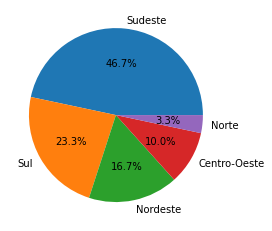

In [14]:
labels = df_estatisticas["Região"].values
publis = df_estatisticas['Publicações de Papers'].values

plt.pie(publis, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f067748f580>,
 [Text(0.2718121627764151, 1.0658884313880173, 'Sudeste'),
  Text(-1.0985556553840272, 0.05635132672591155, 'Sul'),
  Text(-0.3467845497876199, -1.0439063540512616, 'Nordeste'),
  Text(0.7705485400773245, -0.7850190745355835, 'Centro-Oeste'),
  Text(1.0585081940332486, -0.2992664417613021, 'Norte')],
 [Text(0.1482611796962264, 0.5813936898480093, '42.1%'),
  Text(-0.5992121756640149, 0.03073708730504266, '14.3%'),
  Text(-0.1891552089750654, -0.5694034658461427, '27.2%'),
  Text(0.4202992036785406, -0.4281922224739546, '7.8%'),
  Text(0.5773681058363173, -0.16323624096071024, '8.8%')])

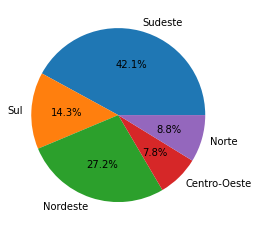

In [15]:
labels = df_estatisticas["Região"].values
pop = df_estatisticas['População'].values

plt.pie(pop, labels=labels, autopct='%1.1f%%')

([<matplotlib.patches.Wedge at 0x7f06779bae80>,
 [Text(-0.17856670536313793, 1.085409568658649, 'Sudeste'),
  Text(-0.7386407501369436, -0.8151133922572573, 'Sul'),
  Text(0.21650241097771594, -1.0784835214507622, 'Nordeste'),
  Text(0.8830193441971412, -0.655954905289724, 'Centro-Oeste'),
  Text(1.0849688800648047, -0.18122507908930136, 'Norte')],
 [Text(-0.09740002110716613, 0.5920415829047175, '55.2%'),
  Text(-0.402894954620151, -0.44460730486759487, '16.2%'),
  Text(0.11809222416966322, -0.5882637389731429, '13.6%'),
  Text(0.4816469150166224, -0.3577935847034858, '9.8%'),
  Text(0.5918012073080753, -0.09885004313961891, '5.3%')])

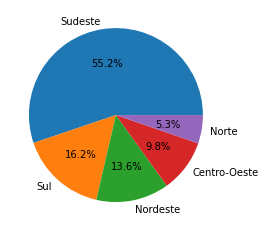

In [16]:
labels = df_estatisticas["Região"].values
pib = df_estatisticas['PIB'].values

plt.pie(pib, labels=labels, autopct='%1.1f%%')

In [17]:
# Tabela que mostra a variação das parcelas dos gêneros (homem e mulher) dos autores de publicações acadêmicas na categoria ciências gerais 

df_publis_ufrj = df_publis[df_publis['University']=='Universidade Federal do Rio de Janeiro']
df_publis_ufrj_geral = df_publis_ufrj[df_publis_ufrj["Field"] == "All sciences"]
df_publis_ufrj_geral = df_publis_ufrj_geral[['University','Field', 'Period', "PA_M_MF", 'PA_F_MF']]

df_publis_ufrj_geral

,University,Field,Period,PA_M_MF,PA_F_MF
86880,Universidade Federal do Rio de Janeiro,All sciences,2006–2009,"56,8%","43,2%"
86881,Universidade Federal do Rio de Janeiro,All sciences,2007–2010,"56,5%","43,5%"
86882,Universidade Federal do Rio de Janeiro,All sciences,2008–2011,"56,0%","44,0%"
86883,Universidade Federal do Rio de Janeiro,All sciences,2009–2012,"56,3%","43,7%"
86884,Universidade Federal do Rio de Janeiro,All sciences,2010–2013,"55,7%","44,3%"
86885,Universidade Federal do Rio de Janeiro,All sciences,2011–2014,"55,2%","44,8%"
86886,Universidade Federal do Rio de Janeiro,All sciences,2012–2015,"55,2%","44,8%"
86887,Universidade Federal do Rio de Janeiro,All sciences,2013–2016,"55,0%","45,0%"
86888,Universidade Federal do Rio de Janeiro,All sciences,2014–2017,"55,2%","44,8%"
86889,Universidade Federal do Rio de Janeiro,All sciences,2015–2018,"55,7%","44,3%"


['56,8%' '56,5%' '56,0%' '56,3%' '55,7%' '55,2%' '55,2%' '55,0%' '55,2%'
 '55,7%']
0.568
0.565
0.56
0.563
0.557
0.552
0.552
0.55
0.552
0.557
0.43200000000000005
0.435
0.44
0.43700000000000006
0.44299999999999995
0.44799999999999995
0.44799999999999995
0.45
0.44799999999999995
0.44299999999999995


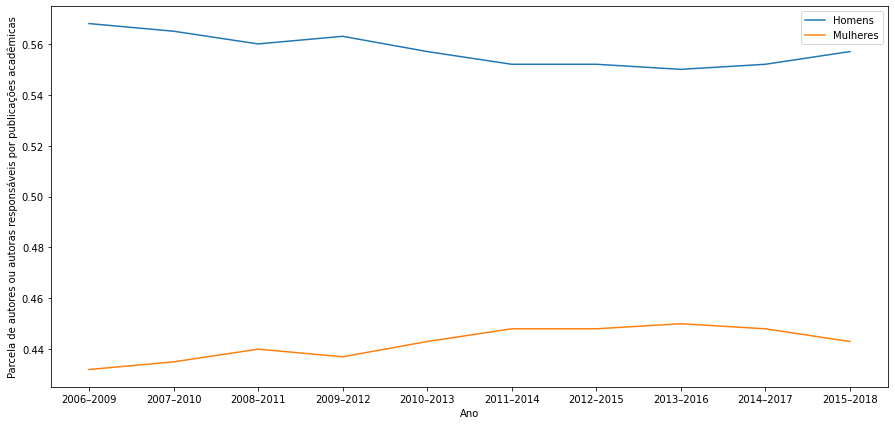

In [18]:
x = df_publis_ufrj_geral["Period"].values
y1 = df_publis_ufrj_geral["PA_M_MF"].values
y2 = df_publis_ufrj_geral["PA_F_MF"].values

print(df_publis_ufrj_geral["PA_M_MF"].values)

# Transformando dados de y1 e y2 em floats

i = 0
while i < len(y1):
  if type(y1[i]) == str:
    y1[i] = y1[i].replace(',', '.')
    y1[i] = y1[i].replace('%', '')
    y1[i] = float(y1[i])/100
    print(y1[i])
  i+=1

i = 0
while i < len(y2):
  if type(y2[i]) == str:
    y2[i] = y2[i].replace(',', '.')
    y2[i] = y2[i].replace('%', '')
    y2[i] = float(y2[i])/100
    print(y2[i])
  i+=1


plt.figure(figsize=(15, 7 ))
plt.plot(x,  y1, label="Homens")
plt.plot(x,  y2, label="Mulheres")

plt.xlabel ('Ano')
plt.ylabel ('Parcela de autores ou autoras responsáveis por publicações acadêmicas')

#invert_yaxis()

plt.legend()


In [19]:
# Tabela que mostra a variação das parcelas dos gêneros (homem e mulher) dos autores de publicações acadêmicas na categoria "Matemática e ciência da computação"

df_publis_ufrj_computacao = df_publis_ufrj[df_publis_ufrj["Field"] == "Mathematics and computer science"]
df_publis_ufrj_computacao = df_publis_ufrj_computacao[["University", 'Field', 'Period', "PA_M_MF", 'PA_F_MF']]

df_publis_ufrj_computacao

,University,Field,Period,PA_M_MF,PA_F_MF
86940,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2006–2009,"80,9%","19,1%"
86941,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2007–2010,"80,1%","19,9%"
86942,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2008–2011,"78,9%","21,1%"
86943,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2009–2012,"79,7%","20,3%"
86944,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2010–2013,"78,5%","21,5%"
86945,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2011–2014,"78,2%","21,8%"
86946,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2012–2015,"78,8%","21,2%"
86947,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2013–2016,"78,5%","21,5%"
86948,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2014–2017,"79,8%","20,2%"
86949,Universidade Federal do Rio de Janeiro,Mathematics and computer science,2015–2018,"80,6%","19,4%"


['80,9%' '80,1%' '78,9%' '79,7%' '78,5%' '78,2%' '78,8%' '78,5%' '79,8%'
 '80,6%']
0.809
0.8009999999999999
0.789
0.797
0.785
0.782
0.7879999999999999
0.785
0.7979999999999999
0.8059999999999999
0.191
0.19899999999999998
0.21100000000000002
0.203
0.215
0.218
0.212
0.215
0.20199999999999999
0.19399999999999998


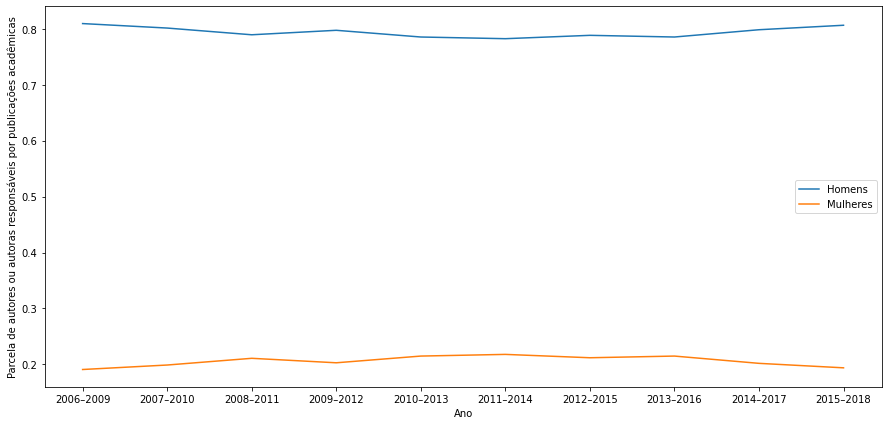

In [20]:
x = df_publis_ufrj_computacao["Period"].values
y1 = df_publis_ufrj_computacao["PA_M_MF"].values
y2 = df_publis_ufrj_computacao["PA_F_MF"].values

print(df_publis_ufrj_computacao["PA_M_MF"].values)

# Transformando dados de y1 e y2 em floats

i = 0
while i < len(y1):
  if type(y1[i]) == str:
    y1[i] = y1[i].replace(',', '.')
    y1[i] = y1[i].replace('%', '')
    y1[i] = float(y1[i])/100
    print(y1[i])
  i+=1

i = 0
while i < len(y2):
  if type(y2[i]) == str:
    y2[i] = y2[i].replace(',', '.')
    y2[i] = y2[i].replace('%', '')
    y2[i] = float(y2[i])/100
    print(y2[i])
  i+=1


plt.figure(figsize=(15, 7))
plt.plot(x,  y1, label="Homens")
plt.plot(x,  y2, label="Mulheres")

plt.xlabel ('Ano')
plt.ylabel ('Parcela de autores ou autoras responsáveis por publicações acadêmicas')

#invert_yaxis()

plt.legend()

In [21]:
# Tabela que mostra a variação das parcelas dos gêneros (homem e mulher) dos autores de publicações acadêmicas na categoria ciências gerais - UFF

df_publis_uff = df_publis[df_publis['University']=='Universidade Federal Fluminense']
df_publis_uff_geral = df_publis_uff[df_publis_uff["Field"] == "All sciences"]
df_publis_uff_geral = df_publis_uff_geral[["University", 'Field', 'Period', "PA_M_MF", 'PA_F_MF']]

df_publis_uff_geral

,University,Field,Period,PA_M_MF,PA_F_MF
87000,Universidade Federal Fluminense,All sciences,2006–2009,"65,0%","35,0%"
87001,Universidade Federal Fluminense,All sciences,2007–2010,"63,5%","36,5%"
87002,Universidade Federal Fluminense,All sciences,2008–2011,"62,0%","38,0%"
87003,Universidade Federal Fluminense,All sciences,2009–2012,"60,7%","39,3%"
87004,Universidade Federal Fluminense,All sciences,2010–2013,"60,4%","39,6%"
87005,Universidade Federal Fluminense,All sciences,2011–2014,"59,8%","40,2%"
87006,Universidade Federal Fluminense,All sciences,2012–2015,"58,6%","41,4%"
87007,Universidade Federal Fluminense,All sciences,2013–2016,"58,1%","41,9%"
87008,Universidade Federal Fluminense,All sciences,2014–2017,"57,2%","42,8%"
87009,Universidade Federal Fluminense,All sciences,2015–2018,"57,5%","42,5%"


['65,0%' '63,5%' '62,0%' '60,7%' '60,4%' '59,8%' '58,6%' '58,1%' '57,2%'
 '57,5%']
0.65
0.635
0.62
0.607
0.604
0.598
0.586
0.581
0.5720000000000001
0.575
0.35
0.365
0.38
0.39299999999999996
0.396
0.402
0.414
0.419
0.428
0.425


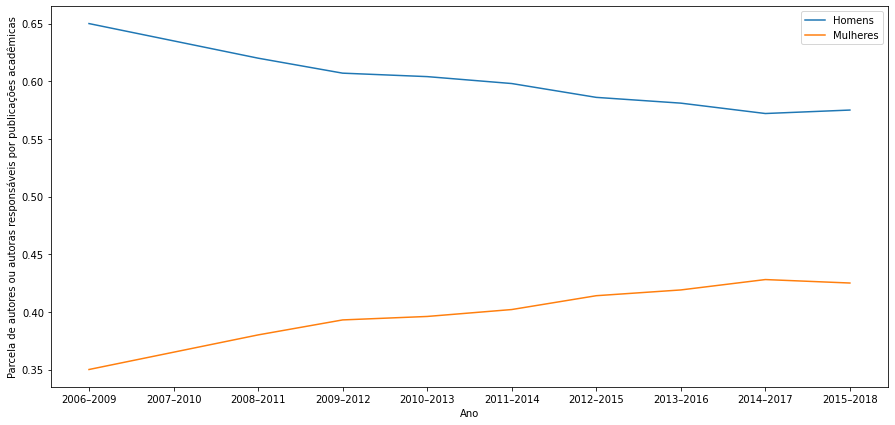

In [22]:
x = df_publis_uff_geral["Period"].values
y1 = df_publis_uff_geral["PA_M_MF"].values
y2 = df_publis_uff_geral["PA_F_MF"].values

print(df_publis_uff_geral["PA_M_MF"].values)

# Transformando dados de y1 e y2 em floats

i = 0
while i < len(y1):
  if type(y1[i]) == str:
    y1[i] = y1[i].replace(',', '.')
    y1[i] = y1[i].replace('%', '')
    y1[i] = float(y1[i])/100
    print(y1[i])
  i+=1

i = 0
while i < len(y2):
  if type(y2[i]) == str:
    y2[i] = y2[i].replace(',', '.')
    y2[i] = y2[i].replace('%', '')
    y2[i] = float(y2[i])/100
    print(y2[i])
  i+=1


plt.figure(figsize=(15, 7 ))
plt.plot(x,  y1, label="Homens")
plt.plot(x,  y2, label="Mulheres")

plt.xlabel ('Ano')
plt.ylabel ('Parcela de autores ou autoras responsáveis por publicações acadêmicas')

#invert_yaxis()

plt.legend()

In [23]:
# Tabela que mostra a variação das parcelas dos gêneros (homem e mulher) dos autores de publicações acadêmicas na categoria "Matemática e ciência da computação" - UFF

df_publis_uff_computacao = df_publis_uff[df_publis_uff["Field"] == "Mathematics and computer science"]
df_publis_uff_computacao = df_publis_uff_computacao[["University", 'Field', 'Period', "PA_M_MF", 'PA_F_MF']]

df_publis_uff_computacao

,University,Field,Period,PA_M_MF,PA_F_MF
87060,Universidade Federal Fluminense,Mathematics and computer science,2006–2009,"77,7%","22,3%"
87061,Universidade Federal Fluminense,Mathematics and computer science,2007–2010,"79,6%","20,4%"
87062,Universidade Federal Fluminense,Mathematics and computer science,2008–2011,"79,6%","20,4%"
87063,Universidade Federal Fluminense,Mathematics and computer science,2009–2012,"79,6%","20,4%"
87064,Universidade Federal Fluminense,Mathematics and computer science,2010–2013,"79,1%","20,9%"
87065,Universidade Federal Fluminense,Mathematics and computer science,2011–2014,"79,3%","20,7%"
87066,Universidade Federal Fluminense,Mathematics and computer science,2012–2015,"78,0%","22,0%"
87067,Universidade Federal Fluminense,Mathematics and computer science,2013–2016,"78,2%","21,8%"
87068,Universidade Federal Fluminense,Mathematics and computer science,2014–2017,"76,5%","23,5%"
87069,Universidade Federal Fluminense,Mathematics and computer science,2015–2018,"77,8%","22,2%"


['77,7%' '79,6%' '79,6%' '79,6%' '79,1%' '79,3%' '78,0%' '78,2%' '76,5%'
 '77,8%']
0.777
0.7959999999999999
0.7959999999999999
0.7959999999999999
0.7909999999999999
0.7929999999999999
0.78
0.782
0.765
0.778
0.223
0.204
0.204
0.204
0.209
0.207
0.22
0.218
0.235
0.222


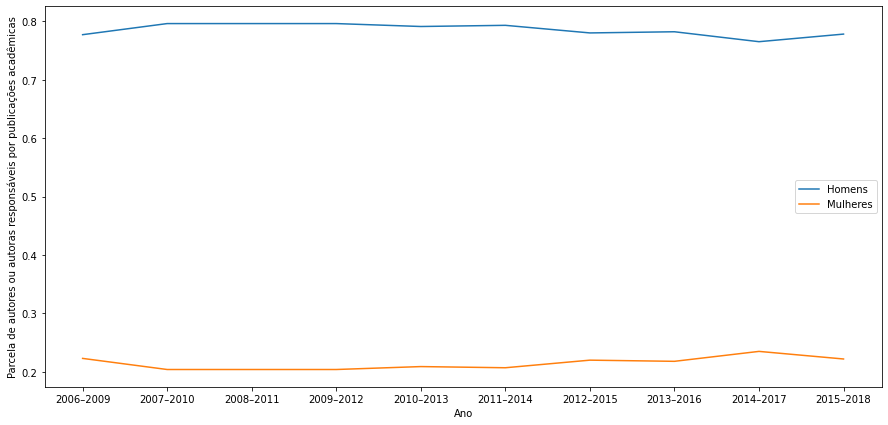

In [24]:
x = df_publis_uff_computacao["Period"].values
y1 = df_publis_uff_computacao["PA_M_MF"].values
y2 = df_publis_uff_computacao["PA_F_MF"].values

print(df_publis_uff_computacao["PA_M_MF"].values)

# Transformando dados de y1 e y2 em floats

i = 0
while i < len(y1):
  if type(y1[i]) == str:
    y1[i] = y1[i].replace(',', '.')
    y1[i] = y1[i].replace('%', '')
    y1[i] = float(y1[i])/100
    print(y1[i])
  i+=1

i = 0
while i < len(y2):
  if type(y2[i]) == str:
    y2[i] = y2[i].replace(',', '.')
    y2[i] = y2[i].replace('%', '')
    y2[i] = float(y2[i])/100
    print(y2[i])
  i+=1


plt.figure(figsize=(15, 7))
plt.plot(x,  y1, label="Homens")
plt.plot(x,  y2, label="Mulheres")

plt.xlabel ('Ano')
plt.ylabel ('Parcela de autores ou autoras responsáveis por publicações acadêmicas')

#invert_yaxis()

plt.legend()